<a href="https://colab.research.google.com/github/vdnew/Health-Insurance-Lead-Prediction/blob/main/Experiment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
path = '/content/train_Df64byy.csv'

traindata = pd.read_csv(path)

In [5]:
traindata.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,C5,3732,Owned,Individual,32,32,No,NaN,1,1.0,19,7450.0,1
3,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,C8,2190,Rented,Individual,44,44,No,X2,3,1.0,16,10404.0,0


In [6]:
traindata.describe()

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [7]:
traindata.tail()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
50877,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,C5,4188,Rented,Individual,27,27,No,X3,7,3.0,4,5408.0,0
50879,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,C1,4,Owned,Joint,71,49,No,X2,2,2.0,16,28179.2,1
50881,C3,3866,Rented,Individual,24,24,No,X3,2,3.0,18,11424.0,0


In [8]:
traindata.dtypes

City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

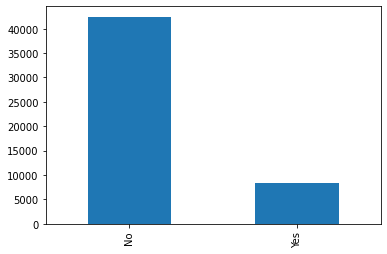

In [9]:
traindata['Is_Spouse'].value_counts().plot(kind='bar')

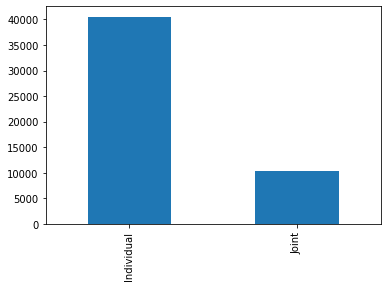

In [10]:
traindata['Reco_Insurance_Type'].value_counts().plot(kind='bar')

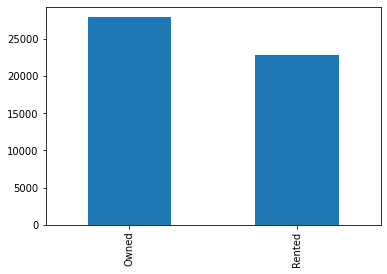

In [11]:
traindata['Accomodation_Type'].value_counts().plot(kind='bar')

In [12]:
plt.figure(figsize = (20, 20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

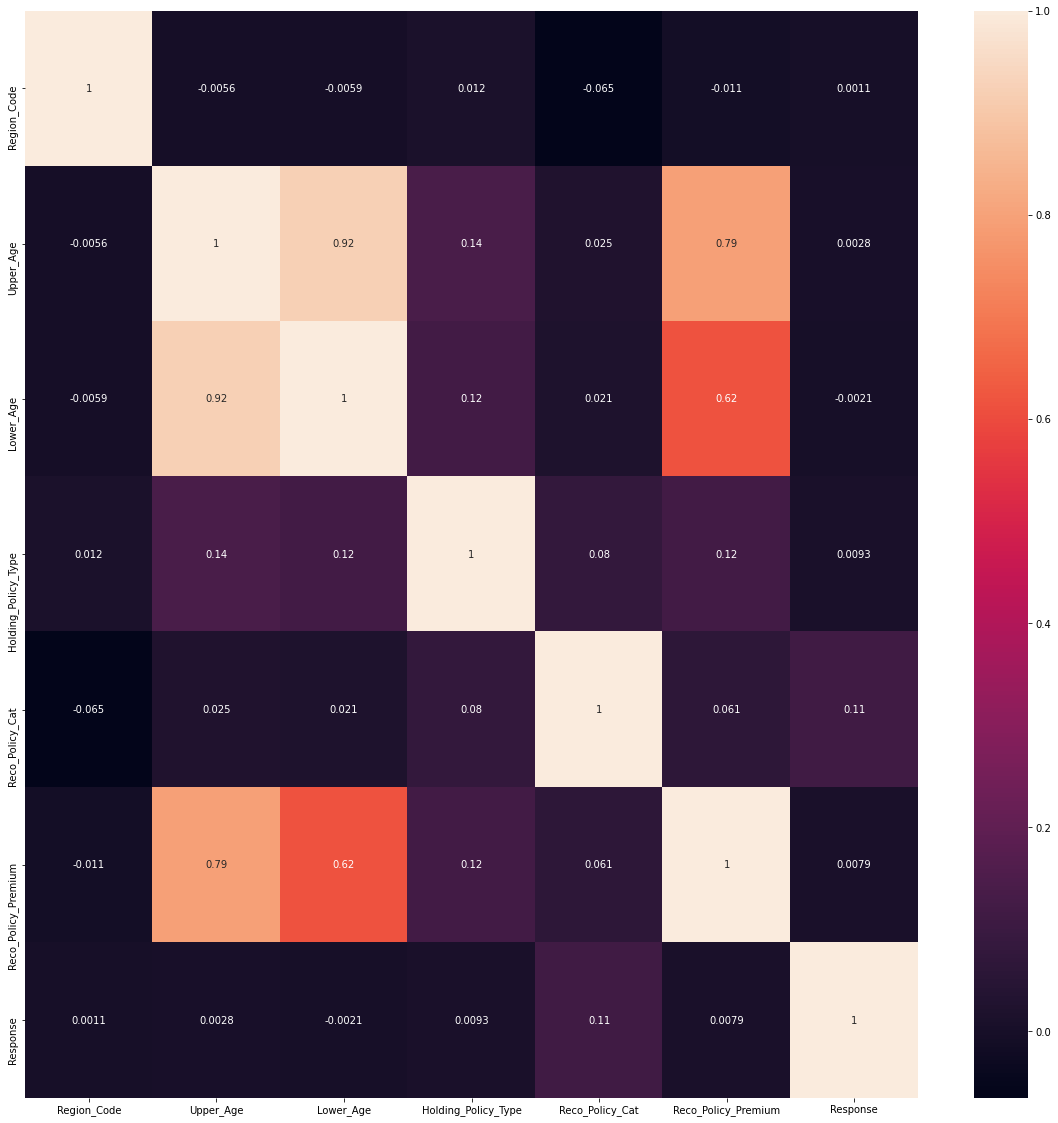

In [13]:
plt.figure(figsize=(20, 20))
cm = traindata.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

In [14]:
traindata.isnull()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,False,False,False,False,False,False,False,False,True,True,False,False,False
50878,False,False,False,False,False,False,False,False,False,False,False,False,False
50879,False,False,False,False,False,False,False,False,False,False,False,False,False
50880,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
traindata.isnull().sum()

City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [18]:
traindata.fillna(traindata.mean(), inplace=True)

In [19]:
traindata.isnull().sum()

City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [20]:
traindata.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,36,No,X1,14+,3.000000,22,11628.0,0
1,C5,1117,Owned,Joint,75,22,No,X2,NaN,2.439228,22,30510.0,0
2,C5,3732,Owned,Individual,32,32,No,NaN,1,1.000000,19,7450.0,1
3,C24,4378,Owned,Joint,52,48,No,X1,14+,3.000000,19,17780.0,0
4,C8,2190,Rented,Individual,44,44,No,X2,3,1.000000,16,10404.0,0


In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
enc = OneHotEncoder(handle_unknown='ignore')

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
traindata['Health Indicator'] = traindata['Health Indicator'].astype('str')

In [25]:
traindata.dtypes

City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [26]:
traindata['Holding_Policy_Duration'] = traindata['Holding_Policy_Duration'].astype('str')

In [27]:
traindata.dtypes

City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [28]:
traindata['Holding_Policy_Duration'] = le.fit_transform(traindata['Holding_Policy_Duration'])

In [29]:
traindata['Health Indicator'] = le.fit_transform(traindata['Health Indicator'])

In [30]:
traindata.dtypes

City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator             int64
Holding_Policy_Duration      int64
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [31]:
traindata.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,36,No,0,6,3.000000,22,11628.0,0
1,C5,1117,Owned,Joint,75,22,No,1,15,2.439228,22,30510.0,0
2,C5,3732,Owned,Individual,32,32,No,9,0,1.000000,19,7450.0,1
3,C24,4378,Owned,Joint,52,48,No,0,6,3.000000,19,17780.0,0
4,C8,2190,Rented,Individual,44,44,No,1,8,1.000000,16,10404.0,0


In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
enc = OneHotEncoder(handle_unknown='ignore')

In [37]:
traindata['Accomodation_Type'] = traindata['Accomodation_Type'].astype('str')

In [39]:
traindata['Reco_Insurance_Type'] = traindata['Reco_Insurance_Type'].astype('str')

In [40]:
traindata.dtypes

City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator             int64
Holding_Policy_Duration      int64
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [42]:
traindata['Accomodation_Type'] = le.fit_transform(traindata['Accomodation_Type'])

In [45]:
traindata['Reco_Insurance_Type'] = le.fit_transform(traindata['Reco_Insurance_Type'])

In [47]:
traindata['Is_Spouse'] = le.fit_transform(traindata['Is_Spouse'])

In [51]:
traindata['City_Code'] = traindata['City_Code'].astype('str')

In [53]:
traindata.dtypes

City_Code                   object
Region_Code                  int64
Accomodation_Type            int64
Reco_Insurance_Type          int64
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                    int64
Health Indicator             int64
Holding_Policy_Duration      int64
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object